In [13]:
## Project Title : Intelligent Navigation System to Avoid Infected Covid-19 Areas with Reinforcement Learning
#@ Author : Sudip Mitra
# E-mail : sudipmitraonline@gmail.com

In [ ]:
#Install Required
!apt-get -qq install -y libspatialindex-dev
!pip install -q -U osmnx
!pip install matplotlib==3.1.3

In [15]:
# Sudip Mitra: north, east, south, west = 22.5862, 88.3785, 22.5764,88.3645
# Sudip Mitra: orange = [1177655232,1176976769,663846649,1202746627,1176978122,1202746673,1177816130,1195827529,1177815769,1194743066,663940665,1202168183,1202168279]
# red = [1217614532,663847554,2281800874,1177815903,1217614604,1217614501,121761790,1202332476,1217614545,1217614635,1217614499,1217614509,663843644]
# Sudip Mitra: initial_state = 21     #assign source node number
# goal = 41                           #assign destination node number

In [16]:
import numpy as np
import pylab as plt
import networkx as nx
import time 
import osmnx as ox
import matplotlib.pyplot as plt
ox.config(use_cache=True, log_console=True)

In [17]:
# Defining the map boundaries 
north, east, south, west = 22.5862, 88.3785, 22.5764, 88.3645

# Downloading the map as a graph object 
G = ox.graph_from_bbox(north, south, east, west, network_type = 'drive')  

red = [1177655232,1176976769,663846649,1202746627,1176978122,1202746673,1177816130,1195827529,1177815769,1194743066,663940665,1202168183,1202168279]        #assign node numbers of edges in red zone
orange = [1217614532,663847554,2281800874,1177815903,1217614604,1217614501,121761790,1202332476,1217614545,1217614635,1217614499,1217614509,663843644]      #assign node numbers of edges in orange zone

0  -  663843644
1  -  663846649
2  -  663847548
3  -  663847554
4  -  663940656
5  -  663940665
6  -  663940666
7  -  664446482
8  -  1176976769
9  -  1176978122
10  -  1177655232
11  -  1177815213
12  -  1177815361
13  -  1177815769
14  -  1177815854
15  -  1177815903
16  -  1177816130
17  -  1194742715
18  -  1194742977
19  -  1194743014
20  -  1194743066
21  -  1194743076
22  -  1195827529
23  -  1196059624
24  -  1200782099
25  -  1202168057
26  -  1202168183
27  -  1202168279
28  -  1202332476
29  -  1202746627
30  -  1202746673
31  -  1217614493
32  -  1217614499
33  -  1217614501
34  -  1217614509
35  -  1217614510
36  -  1217614532
37  -  1217614545
38  -  1217614574
39  -  1217614579
40  -  1217614580
41  -  1217614581
42  -  1217614604
43  -  1217614635
44  -  1217614783
45  -  1217614790
46  -  2281800874
average path length :  176.0204108527131
maximum path length :  416.677
minimum path length :  15.602


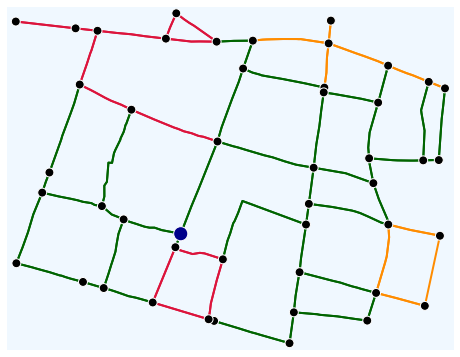

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa47df020d0>)

In [18]:
nodes = []
node_color = []
node_size = []

initial_state =  21     #assign source node number
goal = 41               #assign destination node number

for i in range(len(list(G.nodes(data = True)))):
    temp = list(G.nodes(data = True))[i]
    nodes.append(temp[0])
    print(i," - ",temp[0])
    if i == initial_state:
        node_color.append('darkblue')
        node_size.append(200)
    else:
        node_color.append('k')
        node_size.append(80)
    
edges = []
edge_color = []
max_path_len = 0
min_path_len = 1000
avg_path_len = 0


for i in range(len(list(G.edges(data = True)))):
    temp1 = list(G.edges(data = True))[i]
    length = temp1[2]['length']
    
    if min_path_len>length:
        min_path_len = length
    if max_path_len<length:
        max_path_len = length
    avg_path_len += length
    
    alpha = 0; 
    node1 = temp1[0]
    node2 = temp1[1]
    if node1 in red and node2 in red:
        edge_color.append('crimson')
        alpha = 0.3 # assign contamination factor for red
    elif node1 in orange and node2 in orange:
        edge_color.append('darkorange')
        alpha = 0.2 # assign contamination factor for orange
    else:
        edge_color.append('darkgreen')
        alpha = 0.1  # assign contamination factor for green
    temp2 = (nodes.index(node1), nodes.index(node2), length, alpha)
    edges.append(temp2)

avg_path_len = avg_path_len/len(edges)
print("average path length : ",avg_path_len)
print("maximum path length : ",max_path_len)
print("minimum path length : ",min_path_len)

# Plotting the map graph 
# ox.plot_graph(G,node_zorder=3,annotate = True,node_edgecolor = 'w',node_color = node_color, node_size = node_size, edge_color = edge_color, edge_linewidth=2, use_geom = True, bgcolor = "aliceblue")
ox.plot_graph(G,node_zorder=3,node_edgecolor = 'w',node_color = node_color, node_size = node_size, edge_color = edge_color, edge_linewidth=2, bgcolor = "aliceblue")



In [19]:
MATRIX_SIZE = len(nodes)
print(MATRIX_SIZE)

# create matrix x*y
R = np.matrix(np.ones(shape=(MATRIX_SIZE, MATRIX_SIZE)))
R *= -100

def sigmoid(x):
    return 1/(1+np.exp(-x))

gamma = 0.5 #assign gamma value

for point in edges:
    if point[1] == goal:
        R[point[0],point[1]] = 1800
    else:
        R[point[0],point[1]] = max_path_len*point[3]*sigmoid((min_path_len-point[2])/avg_path_len)

    if point[0] == goal:
        R[point[1],point[0]] = 1800
    else:
        R[point[1],point[0]] = max_path_len*point[3]*sigmoid((min_path_len-point[2])/avg_path_len)
        
R[goal,goal] = 1800   



47


In [20]:
def available_actions(state):
    current_state_row = R[state,]
    av_act =np.where(current_state_row >=0)[1]
    return av_act

def sample_next_action(available_actions_range,state):
    next_action = int(np.random.choice(available_act,1))
    return next_action

def update(current_state, action):    
    max_index = np.where(Q[action,] == np.max(Q[action,]))[1]
  
    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size = 1))
    else:
        max_index = int(max_index)
    max_value = Q[action, max_index]
    
    Q[current_state,action] = R[current_state, action] + gamma * max_value
    
    if (np.max(Q) > 0):
        return(np.sum(Q/np.max(Q)*100))
    else:
        return (0)
   


47


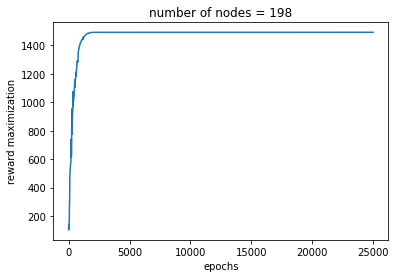

In [21]:
MATRIX_SIZE = len(nodes)
print(MATRIX_SIZE)
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))
    
available_act = available_actions(initial_state) 
action = sample_next_action(available_act,initial_state)
update(initial_state, action)
scores = []
for k in range(25000):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act,current_state)
    score = update(current_state,action)
    scores.append(score)
    
plt.xlabel("epochs")
plt.ylabel("reward maximization")
plt.title("number of nodes = 198")
plt.plot(scores)
plt.show()


In [22]:
current_state = initial_state
steps = [current_state]
prev = current_state;

def avail(state):
    ttt = []
    for y in range(MATRIX_SIZE):
        if Q[state,y] >0:
            ttt.append(y)
        return ttt        

ach = 0
while current_state != goal:
    indices = avail(current_state)
    next_step = []
    for ee in range(len(indices)):
        if indices[ee]==goal:
            ach = 10
            next_step.append((Q[current_state,indices[ee]], indices[ee]))
            break
        elif indices[ee] not in steps:
            next_step.append((Q[current_state,indices[ee]], indices[ee]))
            
    if ach!=10:
        next_step.sort()
        
    if len(next_step)==0:
        print('path not possible')
        steps = nx.shortest_path(G,nodes[1],nodes[goal],weight = 'length')
        for p in range(len(steps)):
            steps[p] = nodes.index(steps[p])
        break
        
    next_step_index = next_step[len(next_step)-1][1]
    steps.append(next_step_index)
    prev = current_state
    current_state = next_step_index
        

path not possible


[1, 16, 22, 13, 2, 31, 25, 38, 41]
[663846649, 1177816130, 1195827529, 1177815769, 663847548, 1217614493, 1202168057, 1217614574, 1217614581]
[21, 20, 27, 26, 24, 6, 41]
[1194743076, 1194743066, 1202168279, 1202168183, 1200782099, 663940666, 1217614581]


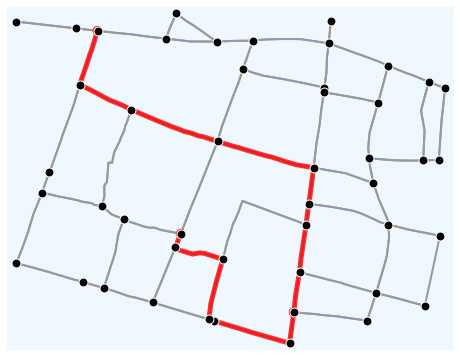

In [23]:
route1 = []
for i in range(len(steps)):
    route1.append(nodes[steps[i]])
print(steps)
print(route1)

steps2=[]
route2 = nx.shortest_path(G,nodes[initial_state],nodes[goal],weight = 'length')
for i in range(len(route2)):
    steps2.append(nodes.index(route2[i]))
    
print(steps2)
print(route2)

c1 = 'green'      #assign colour to Intelligent Navigation System
c2 = 'magenta'      #assign colour to Shortest
rc1 = [c1] * (len(route1) - 1)
rc2 = [c2] * (len(route2) - 1)
rc = rc1 + rc2
nc = [c1, c1, c2, c2]

# plot the routes
# fig, ax = ox.plot_graph_routes(G, [route1,route2], route_color=rc, route_linewidth=5,route_alpha= 0.8,edge_linewidth = 2 ,node_color = 'k',node_zorder = 3,
#                                orig_dest_node_color='maroon', node_edgecolor='w',orig_dest_node_alpha = 0.8, node_size=80,orig_dest_node_size=200,bgcolor='aliceblue')
fig, ax = ox.plot_graph_routes(G, [route1,route2], route_color=rc, route_linewidth=5,route_alpha= 0.8,edge_linewidth = 2 ,node_color = 'k',node_zorder = 3, node_edgecolor='w', node_size=80,bgcolor='aliceblue')
